In [21]:
# Gonzalo
import pandas as pd
import spacy
import nltk
from nltk.tag import StanfordNERTagger

In [31]:
import os
java_path = "C:/Program Files/Java/jdk1.8.0_201/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [2]:
# Importing
conflict_df = pd.read_csv('./data/acled_all.csv')
conflict_df

C:\Users\gonza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,CONTINENT
0,1,12,ALG1,1.0,01-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Douaouda,36.672,2.789,1,www.algeria-watch.org,National,5 January: Beheading of 5 citizens in Douaouda...,5,1546559533,Africa
1,2,12,ALG2,2.0,02-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Hassasna,36.133,0.883,1,www.algeria-watch.org,National,Two citizens were beheaded in Hassasna.,2,1546559533,Africa
2,3,12,ALG3,3.0,03-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Hassi El Abed,34.966,-0.290,1,www.algeria-watch.org,National,Two citizens were killed in a raid on the vill...,2,1546559528,Africa
3,4,12,ALG4,4.0,04-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Blida,36.469,2.829,1,www.algeria-watch.org,National,4 January: 16 citizens were murdered in the vi...,16,1546559533,Africa
4,5,12,ALG5,5.0,05-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Douaouda,36.672,2.789,1,www.algeria-watch.org,National,5 January: Killing of 18 citizens in the Olivi...,18,1546559533,Africa
5,6,12,ALG6,6.0,06-January-1997,1997,1,Battle-no change \nof territory,Police Forces of Algeria (1994-1999),NaN,...,Ain Benian,36.803,2.922,1,www.algeria-watch.org,National,4 armed men were killed by security forces in ...,4,1546559533,Africa
6,7,12,ALG7,7.0,06-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,Hadjout,36.514,2.418,1,www.algeria-watch.org,National,6 January: 23 citizens were horribly mutilated...,23,1546559533,Africa
7,8,12,ALG8,8.0,07-January-1997,1997,1,Remote violence,GIA: Armed Islamic Group,NaN,...,Ain Fakroun,35.971,6.874,1,www.algeria-watch.org,National,Explosion of a bomb in Ain Fakroun (Oum Bouagh...,7,1546559533,Africa
8,9,12,ALG9,9.0,07-January-1997,1997,1,Remote violence,GIA: Armed Islamic Group,NaN,...,Algiers,36.752,3.042,1,www.algeria-watch.org,National,7 January: Explosion of a bomb in the Didouche...,20,1546559533,Africa
9,10,12,ALG10,10.0,07-January-1997,1997,1,Battle-no change \nof territory,Military Forces of Algeria (1994-1999),NaN,...,Douaouda,36.672,2.789,1,www.algeria-watch.org,National,Clashes between the military and militants in ...,0,1546559533,Africa


In [3]:
conflict_df.columns

Index(['Unnamed: 0', 'ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE',
       'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1',
       'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2', 'INTERACTION', 'REGION',
       'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES',
       'FATALITIES', 'TIMESTAMP', 'CONTINENT'],
      dtype='object')

In [51]:
conflict_df[['INTER1', 'INTER2', 'NOTES', 'NOTES_CHAR']]

,INTER1,INTER2,NOTES,NOTES_CHAR
0,2,7,5 January: Beheading of 5 citizens in Douaouda...,56.0
1,2,7,Two citizens were beheaded in Hassasna.,39.0
2,2,7,Two citizens were killed in a raid on the vill...,139.0
3,2,7,4 January: 16 citizens were murdered in the vi...,220.0
4,2,7,5 January: Killing of 18 citizens in the Olivi...,178.0
5,1,2,4 armed men were killed by security forces in ...,152.0
6,2,7,6 January: 23 citizens were horribly mutilated...,95.0
7,2,7,Explosion of a bomb in Ain Fakroun (Oum Bouagh...,72.0
8,2,7,7 January: Explosion of a bomb in the Didouche...,81.0
9,1,2,Clashes between the military and militants in ...,76.0


In [50]:
conflict_df['NOTES_CHAR'] = conflict_df.NOTES.str.len()

AxesSubplot(0.125,0.125;0.775x0.755)


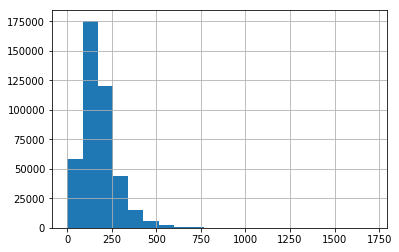

In [56]:
print(conflict_df.NOTES_CHAR.hist(bins=20))

In [4]:
conflict_df.CONTINENT.value_counts()

Africa         172714
Asia           145313
Middle East    114026
Name: CONTINENT, dtype: int64

In [37]:
one_obs = conflict_df.NOTES[450]
one_obs

'26th Feb 2001- BBC Mon-Large military offensive all over the country sees 9 soldiers and 6 GIA killed'

In [38]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(one_obs)

In [39]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])


Noun phrases: ['Feb 2001-', 'BBC Mon-Large military offensive', 'the country', '9 soldiers', '6 GIA']
Verbs: ['see', 'kill']


In [40]:
print(one_obs)
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

26th Feb 2001- BBC Mon-Large military offensive all over the country sees 9 soldiers and 6 GIA killed
26th ORDINAL
BBC Mon-Large ORG
9 CARDINAL
6 CARDINAL


In [41]:
print('NTLK Version: %s' % nltk.__version__)


NTLK Version: 3.2.5


In [42]:

stanford_ner_tagger = StanfordNERTagger(
    'C:/Users/gonza/stanford_ner/' + 'classifiers/english.muc.7class.distsim.crf.ser.gz',
    'C:/Users/gonza/stanford_ner/' + 'stanford-ner-3.9.2.jar'
)


C:\Users\gonza\Anaconda3\lib\site-packages\nltk\tag\stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [43]:
results = stanford_ner_tagger.tag(one_obs.split())

In [44]:
print('Original Sentence: %s' % (one_obs))
for result in results:
    tag_value = result[0]
    tag_type = result[1]
    if tag_type != 'O':
        print('Type: %s, Value: %s' % (tag_type, tag_value))


Original Sentence: 26th Feb 2001- BBC Mon-Large military offensive all over the country sees 9 soldiers and 6 GIA killed
Type: ORGANIZATION, Value: BBC
Type: ORGANIZATION, Value: GIA


In [57]:
results

[('26th', 'O'),
 ('Feb', 'O'),
 ('2001-', 'O'),
 ('BBC', 'ORGANIZATION'),
 ('Mon-Large', 'O'),
 ('military', 'O'),
 ('offensive', 'O'),
 ('all', 'O'),
 ('over', 'O'),
 ('the', 'O'),
 ('country', 'O'),
 ('sees', 'O'),
 ('9', 'O'),
 ('soldiers', 'O'),
 ('and', 'O'),
 ('6', 'O'),
 ('GIA', 'ORGANIZATION'),
 ('killed', 'O')]

In [62]:
conflict_df_long = conflict_df[conflict_df['NOTES_CHAR'] > 250]

In [77]:
long_text = conflict_df_long.NOTES[431957]
conflict_df_long

,Unnamed: 0,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,CONTINENT,NOTES_CHAR
41,42,12,ALG42,42.0,31-January-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.268,2.750,1,www.algeria-watch.org,National,31 January: The area of Ktiten located in the ...,35,1546559533,Africa,351.0
58,59,12,ALG59,59.0,21-April-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.542,3.081,1,www.algeria-watch.org,National,21 April: An armed group on horses (!) raided ...,120,1546559533,Africa,251.0
83,84,12,ALG84,84.0,27-July-1997,1997,1,Remote violence,GIA: Armed Islamic Group,NaN,...,36.469,2.829,1,Justice Commission for Algeria,Subnational-national,27 July: 36 citizens were killed in the distri...,36,1546559533,Africa,324.0
99,100,12,ALG100,100.0,28-August-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.752,3.042,1,www.algeria-watch.org,National,28 August: Killing in the area of Er-Rais loca...,300,1546559533,Africa,472.0
104,105,12,ALG105,105.0,05-September-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.783,2.983,1,www.algeria-watch.org,National,5 September: Killing of over 70 citizens in th...,70,1546559533,Africa,253.0
109,110,12,ALG110,110.0,22-September-1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.752,3.042,1,www.algeria-watch.org,National,"22 September: Awful killing in Bentalha, in th...",85,1546559533,Africa,251.0
148,149,12,ALG149,149.0,18-February-1998,1998,1,Battle-no change \nof territory,GIA: Armed Islamic Group,NaN,...,36.712,4.046,3,Chicago Sun-Times,International,22 February 1998 Chicago Sun-Times- Muslim mil...,27,1546559533,Africa,252.0
157,158,12,ALG158,158.0,30-April-1998,1998,1,Battle-no change \nof territory,Military Forces of Algeria (1994-1999),NaN,...,34.878,-1.315,1,Lloyds Information Casualty Report,International,6 May 1998 Lloyds Information Casualty Reporto...,0,1546559533,Africa,252.0
158,159,12,ALG159,159.0,02-May-1998,1998,1,Violence against civilians,GIA: Armed Islamic Group,NaN,...,36.268,2.750,1,Lloyds Information Casualty Report,International,May 5 Llyods Info. Cas. report Attackers cut t...,100,1546559533,Africa,253.0
162,163,12,ALG163,163.0,03-May-1998,1998,1,Battle-no change \nof territory,Military Forces of Algeria (1994-1999),NaN,...,34.878,-1.315,1,Lloyds Information Casualty Report,International,"May 5 Lloyds Info. Thirty-five rebels, members...",35,1546559533,Africa,253.0


In [78]:
doc_long = nlp(long_text)


In [79]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc_long.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc_long if token.pos_ == "VERB"])


Noun phrases: ['Three girls', 'the alleged explosion', 'a Houthi-planted landmine', 'the Hawamirah area', 'Taizz', 'Lahij governorates', 'southern Yemen', 'three people', 'Hawamirah', 'clashes', 'place', 'the area']
Verbs: ['be', 'report', 'kill', 'plant', 'note', 'be', 'report', 'kill', 'shell', 'be', 'take']


In [80]:
print(long_text)
# Find named entities, phrases and concepts
for entity in doc_long.ents:
    print(entity.text, entity.label_)

Three girls were reported killed in the alleged explosion of a Houthi-planted landmine in the Hawamirah area between Taizz and Lahij governorates in southern Yemen. *Note that three people were reported killed by pro-Hadi shelling in Hawamirah the day before, as clashes were taking place in the area.
Three CARDINAL
Houthi GPE
Hawamirah GPE
Taizz LOC
Lahij PERSON
Yemen GPE
three CARDINAL
pro-Hadi PERSON
Hawamirah GPE


In [81]:
results_long = stanford_ner_tagger.tag(long_text.split())

In [82]:
print('Original Sentence: %s' % (long_text))
for result in results_long:
    tag_value = result[0]
    tag_type = result[1]
    if tag_type != 'O':
        print('Type: %s, Value: %s' % (tag_type, tag_value))


Original Sentence: Three girls were reported killed in the alleged explosion of a Houthi-planted landmine in the Hawamirah area between Taizz and Lahij governorates in southern Yemen. *Note that three people were reported killed by pro-Hadi shelling in Hawamirah the day before, as clashes were taking place in the area.
Type: LOCATION, Value: Hawamirah
Type: LOCATION, Value: Taizz
Type: LOCATION, Value: Lahij


In [83]:
results_long

[('Three', 'O'),
 ('girls', 'O'),
 ('were', 'O'),
 ('reported', 'O'),
 ('killed', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('alleged', 'O'),
 ('explosion', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('Houthi-planted', 'O'),
 ('landmine', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('Hawamirah', 'LOCATION'),
 ('area', 'O'),
 ('between', 'O'),
 ('Taizz', 'LOCATION'),
 ('and', 'O'),
 ('Lahij', 'LOCATION'),
 ('governorates', 'O'),
 ('in', 'O'),
 ('southern', 'O'),
 ('Yemen.', 'O'),
 ('*Note', 'O'),
 ('that', 'O'),
 ('three', 'O'),
 ('people', 'O'),
 ('were', 'O'),
 ('reported', 'O'),
 ('killed', 'O'),
 ('by', 'O'),
 ('pro-Hadi', 'O'),
 ('shelling', 'O'),
 ('in', 'O'),
 ('Hawamirah', 'O'),
 ('the', 'O'),
 ('day', 'O'),
 ('before,', 'O'),
 ('as', 'O'),
 ('clashes', 'O'),
 ('were', 'O'),
 ('taking', 'O'),
 ('place', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('area.', 'O')]